<a href="https://colab.research.google.com/github/Toludo/Onfire/blob/master/Financial_Incentive_Projects_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('financial_project.csv')

In [ ]:
df

,PROJECT NAME,APPLICANT NAME,ADDRESS NUMBER,ADDRESS NUMBER (HIGH),STREET DIRECTION,STREET NAME,STREET TYPE,WARD,COMMUNITY AREA,APPROVAL DATE,COMPLETION DATE,PROPERTY TYPE,SQUARE FOOTAGE,PROJECT DESCRIPTION,INCENTIVE AMOUNT,TOTAL PROJECT COST,OTHER PUBLIC FUNDING,JOBS CREATED: ASPIRATIONAL,JOBS RETAINED: ASPIRATIONAL,LOCATION
0,"Carniceria la Hacienda No. 4, Inc.",Luis Alfredo Santos,5159,NaN,S,Kedzie,Ave,14,Gage Park,10/3/2018,1/31/2019,Retail,10000,Rehab for grocery store for 4th location of ex...,85775.48,171550.95,NaN,NaN,NaN,POINT (-87.703721 41.799241)
1,"Shawn Michelle's Churned Homemade Icecream, Inc.",NaN,56,NaN,E,47th,St,3,Grand Boulevard,3/13/2018,2/19/2019,Retail,1441,Gut rehab and build-out of a storefront for an...,58246.89,89610.59,NaN,NaN,NaN,POINT (-87.62349 41.809356)
2,Essential Elements,Melanie Whaley,1640,NaN,E,87th,St,8,Avalon Park,8/24/2018,12/20/2018,Retail,3700,Applicant is a recent SBIF awardee. They have ...,20868.38,41736.75,NaN,NaN,NaN,POINT (-87.583558 41.736941)
3,"Sip & Savor 47th, Inc.",Trez V. Pugh III,78,NaN,E,47th,St,3,Grand Boulevard,2/15/2018,2/19/2019,Retail,1400,Complete renovation/build-out of a storefront ...,94250.00,145000.00,NaN,NaN,NaN,POINT (-87.623164 41.809362)
4,Kenwood Dental,"Dr. Eric Barnes, Dr. Ashley Barnes",1335,NaN,E,87th,St,8,Calumet Heights,11/6/2018,11/7/2019,Office,2200,Renovations and modernization of an existing d...,149999.00,299998.00,NaN,3.0,0.0,POINT (-87.591625 41.736832)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Brady Group,Christine Lynch,8534,NaN,W,Daniel Flat,Blvd,40,East Ianstad,01/20/2024,05/03/2023,Retail,4517,Synchronized object-oriented strategy,97869.35,202412.92,NaN,6.0,3.0,POINT (-87.665865 41.976309)
196,"Johnson, Adams and Page",Wesley Green,6024,NaN,N,William Mountain,St,11,Michaelborough,01/11/2022,07/04/2023,Office,11664,Down-sized tertiary focus group,79802.63,158171.20,NaN,3.0,10.0,POINT (-87.669296 41.950202)
197,"Rivera, Bernard and Mcclure",Sarah Simmons,2519,NaN,W,Smith Tunnel,Blvd,3,Karifurt,12/10/2023,12/10/2022,Office,6731,Managed high-level leverage,163313.40,286586.58,NaN,8.0,9.0,POINT (-87.704522 41.674501)
198,"Phillips, Weaver and Bishop",Ronald Jordan,9084,NaN,E,Gabriel Valley,Ln,24,North Carrie,09/23/2023,02/12/2023,Office,19975,Integrated hybrid infrastructure,135011.83,322732.88,NaN,NaN,NaN,POINT (-87.534235 41.91317)


# **1. CHECKING MISSING VALUES**

In [ ]:
df.isnull().sum()

PROJECT NAME                     0
APPLICANT NAME                   1
ADDRESS NUMBER                   0
ADDRESS NUMBER (HIGH)          108
STREET DIRECTION                 0
STREET NAME                      0
STREET TYPE                      0
WARD                             0
COMMUNITY AREA                   0
APPROVAL DATE                    0
COMPLETION DATE                  0
PROPERTY TYPE                    0
SQUARE FOOTAGE                   0
PROJECT DESCRIPTION              0
INCENTIVE AMOUNT                 0
TOTAL PROJECT COST               0
OTHER PUBLIC FUNDING           200
JOBS CREATED: ASPIRATIONAL     103
JOBS RETAINED: ASPIRATIONAL     95
LOCATION                         0
dtype: int64

In [ ]:
for column in df.columns:
    if df[column].isna().sum() != 0:
        print("{} has: {:,} ({:.2%}) missing values.".format(column, df[column].isna().sum(), df[column].isna().sum() / len(df)))


APPLICANT NAME has: 1 (0.50%) missing values.
ADDRESS NUMBER (HIGH) has: 108 (54.00%) missing values.
OTHER PUBLIC FUNDING has: 200 (100.00%) missing values.
JOBS CREATED: ASPIRATIONAL has: 103 (51.50%) missing values.
JOBS RETAINED: ASPIRATIONAL has: 95 (47.50%) missing values.


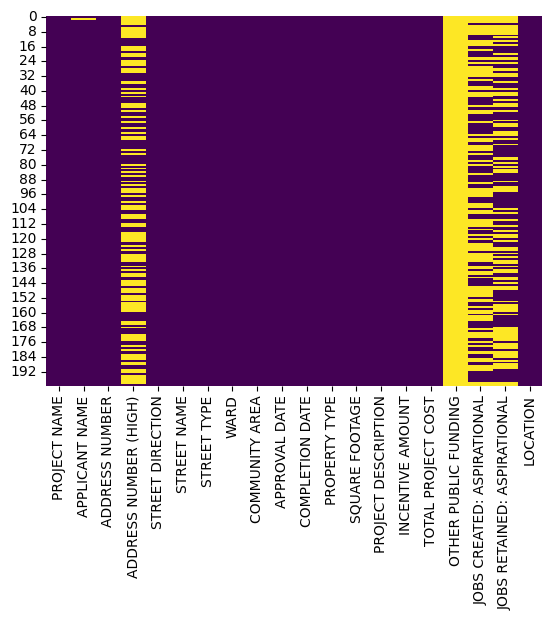

In [ ]:
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.show()

# **2. HANDLING MISSING VALUES**

1. Drop Column Name as "OTHER PUBLIC FUNDING" because whole value of this column is empty/null.

2. Drop row of "applicant name" column because 1 column name is not present.

In [ ]:
df.drop('OTHER PUBLIC FUNDING', axis=1, inplace=True)

In [ ]:
df.dropna(subset=['APPLICANT NAME'], inplace=True)

3. Replacing missing values of column name " ADDRESS NUMBER (HIGH) " by Imputation with Statistical Measures.

4. Replacing missing values of column name " JOBS CREATED: ASPIRATIONAL  " by Imputation with Statistical Measures

5. Replacing missing values of column name " JOBS RETAINED: ASPIRATIONAL  " by Imputation with Statistical Measures

In [ ]:
numerical_cols = ['ADDRESS NUMBER (HIGH)', 'JOBS CREATED: ASPIRATIONAL', 'JOBS RETAINED: ASPIRATIONAL']

In [ ]:
from sklearn.impute import SimpleImputer

# Impute numerical columns with mean
num_imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

# **3. VISUALIZE RESULTS**

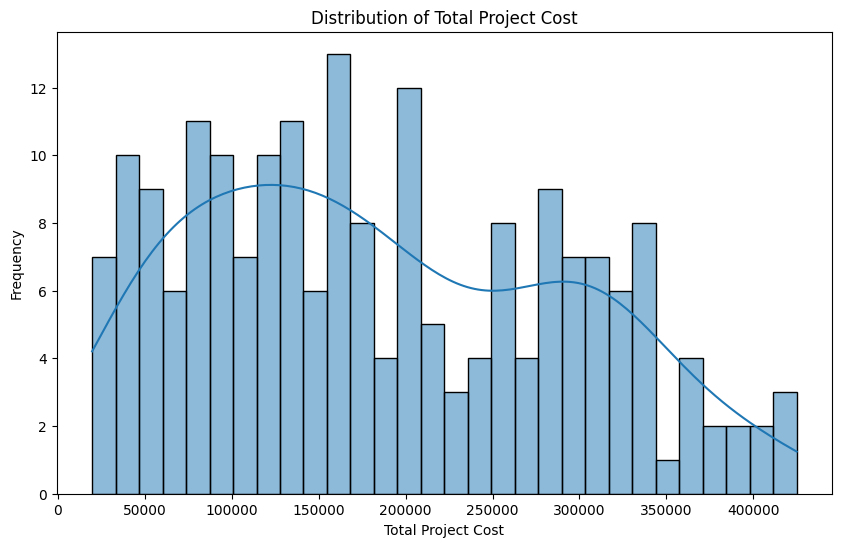

In [ ]:
# Distribution of Total Project Cost
plt.figure(figsize=(10, 6))
sns.histplot(df['TOTAL PROJECT COST'], bins=30, kde=True)
plt.title('Distribution of Total Project Cost')
plt.xlabel('Total Project Cost')
plt.ylabel('Frequency')
plt.show()

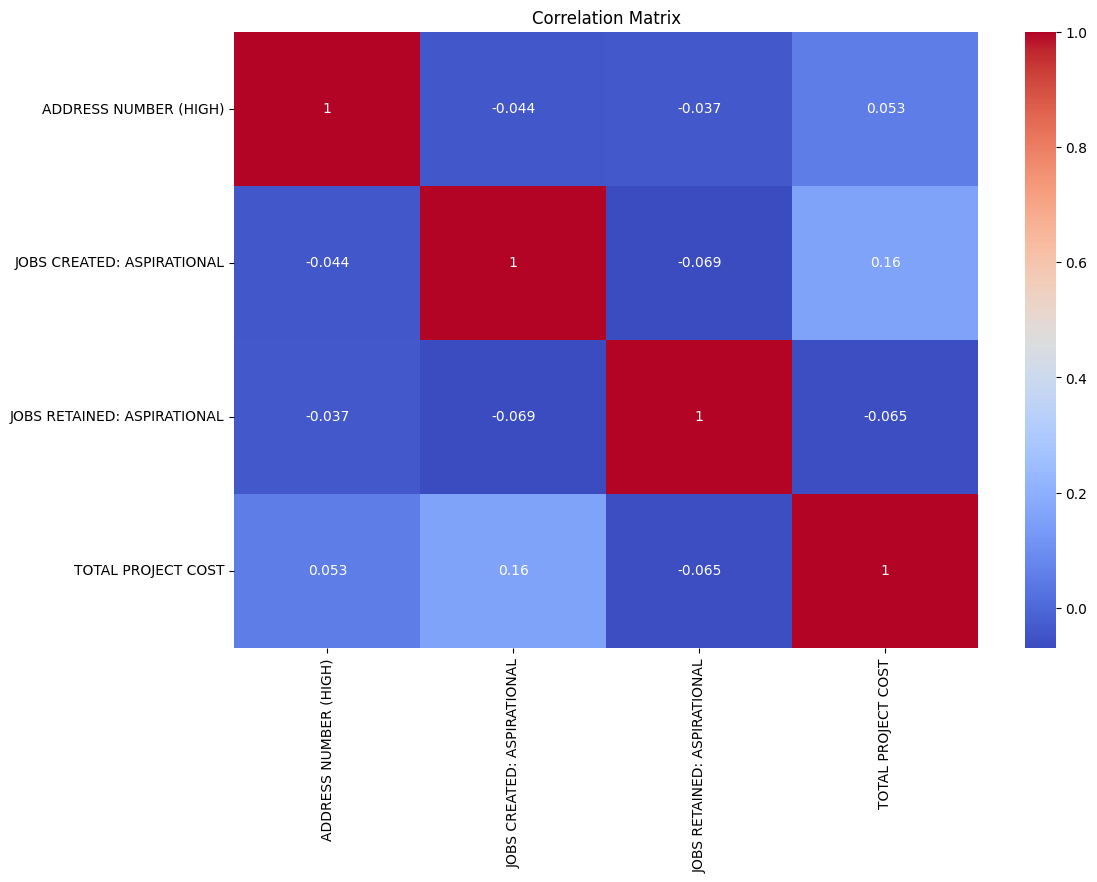

In [ ]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols + ['TOTAL PROJECT COST']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

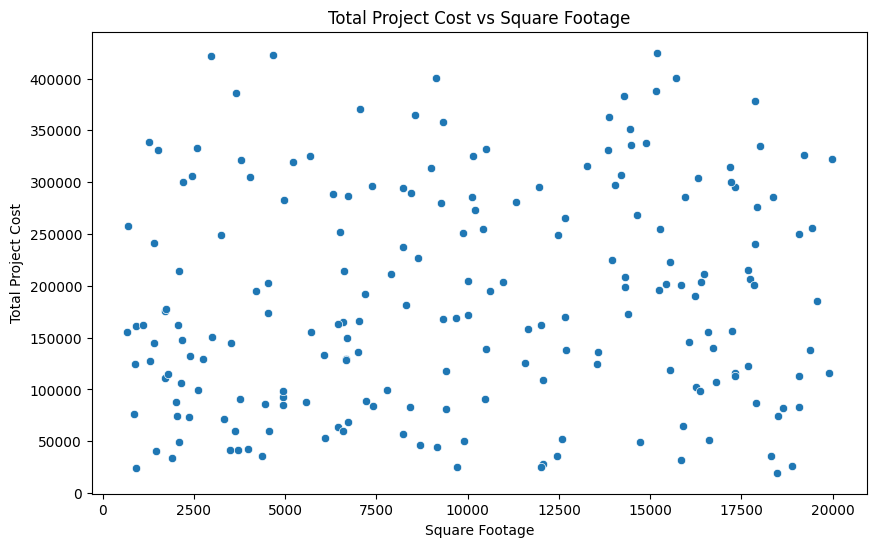

In [ ]:
# Scatter Plot of Total Project Cost vs Square Footage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SQUARE FOOTAGE', y='TOTAL PROJECT COST', data=df)
plt.title('Total Project Cost vs Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Total Project Cost')
plt.show()


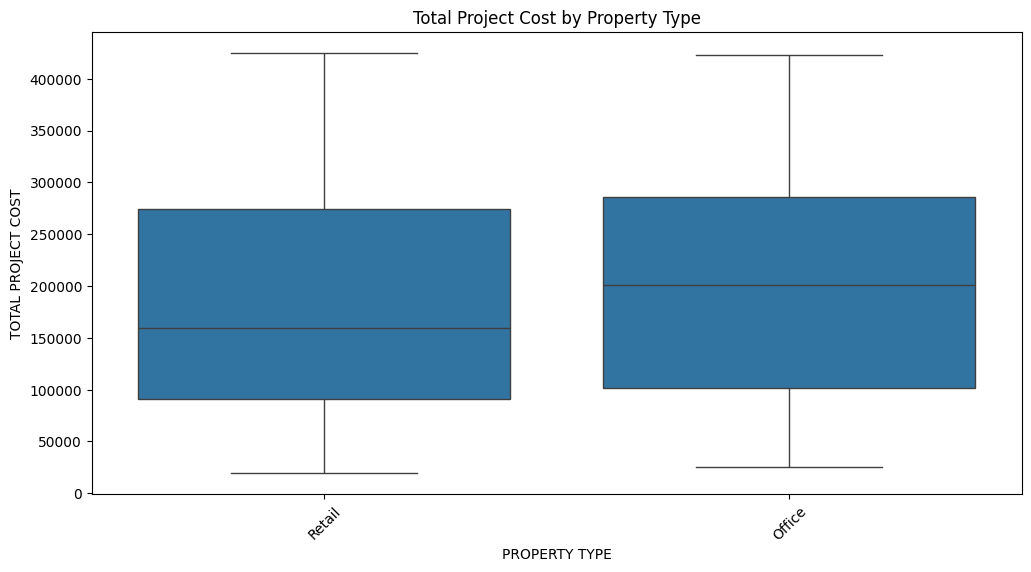

In [ ]:
# Box Plot of Total Project Cost by Property Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='PROPERTY TYPE', y='TOTAL PROJECT COST', data=df)
plt.title('Total Project Cost by Property Type')
plt.xticks(rotation=45)
plt.show()


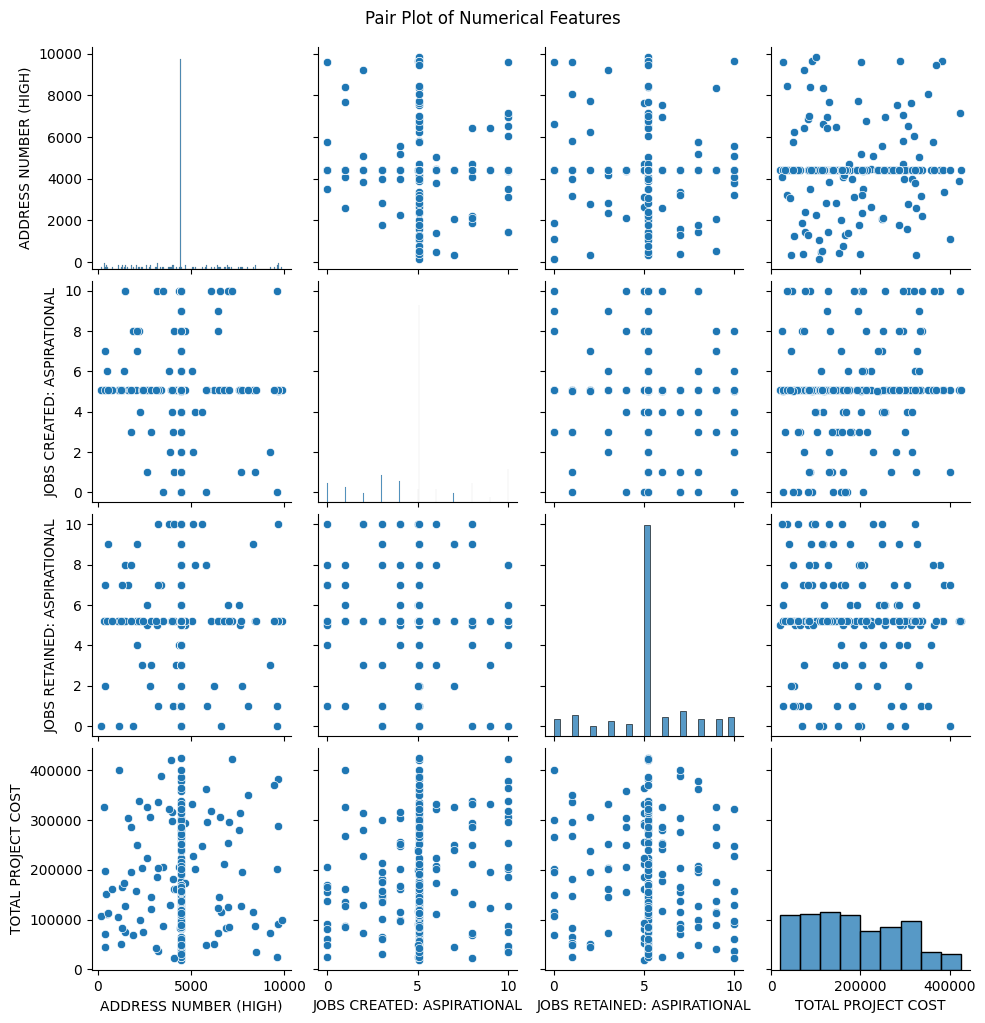

In [ ]:
# Pair Plot of Numerical Features
sns.pairplot(df[numerical_cols + ['TOTAL PROJECT COST']])
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

# **4. DATA ENCODING**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define categorical columns
categorical_cols = ['PROJECT NAME', 'APPLICANT NAME', 'STREET DIRECTION', 'STREET NAME', 'STREET TYPE', 'COMMUNITY AREA', 'PROPERTY TYPE']
numerical_cols = ['ADDRESS NUMBER', 'SQUARE FOOTAGE', 'INCENTIVE AMOUNT', 'WARD']

# One-hot encode categorical variables
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])


# **5. Scale Numerical Features**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Update the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])


# **6. IMPLEMENT MACHINE LEARNING MODELS**

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop('TOTAL PROJECT COST', axis=1)
y = df['TOTAL PROJECT COST']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1)
}

# Function to evaluate a model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Create and evaluate the pipeline
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('model', model)])
    # Fit the model
    clf.fit(X_train, y_train)
    # Predict and evaluate
    y_pred = clf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

# Evaluate all models
results = {}
for model_name, model in models.items():
    mse, r2 = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[model_name] = {"Mean Squared Error": mse, "R-squared": r2}

# Print the results
for model_name, metrics in results.items():
    print("------------------------------------------------------------------------------------------------------------")
    print(f"{model_name}:\n  Mean Squared Error: {metrics['Mean Squared Error']}\n  R-squared: {metrics['R-squared']}\n")


------------------------------------------------------------------------------------------------------------
Linear Regression:
  Mean Squared Error: 721157250.945402
  R-squared: 0.9278444411020625

------------------------------------------------------------------------------------------------------------
Ridge Regression:
  Mean Squared Error: 710890794.9177223
  R-squared: 0.9288716537822473

------------------------------------------------------------------------------------------------------------
Lasso Regression:
  Mean Squared Error: 707210729.4970375
  R-squared: 0.9292398635962129



# **Interpretation of Results**

**1. Linear Regression**
- Mean Squared Error: 721,157,250.945402
- R-squared: 0.9278444411020625
- **Interpretation:** The model explains approximately 92.78% of the variance in the data. The MSE indicates the average squared difference between the actual and predicted values.

**2. Ridge Regression**
- Mean Squared Error: 710,890,794.9177223
- R-squared: 0.9288716537822473

- **Interpretation:** The model explains approximately 92.88% of the variance in the data. The MSE is slightly lower than that of the Linear Regression, indicating a marginally better fit.

**3. Lasso Regression**
- Mean Squared Error: 707,210,729.4970375
- R-squared: 0.9292398635962129

- **Interpretation:** The model explains approximately 92.92% of the variance in the data. The MSE is the lowest among the three models, indicating that Lasso Regression provides the best fit for this dataset.

# **Summary**
- Ridge Regression and Lasso Regression both improve upon the Linear Regression model by adding regularization, which helps prevent overfitting and can lead to better generalization on new data.

- Lasso Regression performs the best among the three models with the lowest MSE and the highest R-squared value, indicating it is the most accurate model for this dataset.

- Overall, the results suggest that all three models perform well, but Lasso Regression provides the best fit for the data.






